<h2><u><b>This Study Consists of 6 Sections:</b></u></h2>

- Section 1: Clean The Dataset
  
- Section 2: Exploratory Insights
  
- Section 3: Test Sub Sample Differences
  
- Section 4: Inference
  
- Section 5: Prediction Model
  
- Section 6: Higher Likelihood of Losing Customers

In [370]:
# Importing Necessary libraries and Packages
# For data manipulation and analysis
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt

# For standardizing data to detect outliers
from scipy.stats import zscore

# For numerical operations
import numpy as np

# For conducting independent t-tests
from scipy.stats import ttest_ind

# For statistical modeling and analysis
import statsmodels.api as sm

# For multicollinearity checks
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For standardizing features before modeling
from sklearn.preprocessing import StandardScaler

# For ridge regression (regularized linear regression)
from sklearn.linear_model import Ridge

 # For dimensionality reduction
from sklearn.decomposition import PCA

# For ensemble regression models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# For regularized regression models
from sklearn.linear_model import Ridge, Lasso

# For evaluating regression model performance
from sklearn.metrics import mean_squared_error, r2_score

 # For binary/multiclass classification
from sklearn.linear_model import LogisticRegression

# For classification evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# For ensemble classification model
from sklearn.ensemble import RandomForestClassifier

# For a summary report of classification metrics
from sklearn.metrics import classification_report

In [371]:
#Loading Dataset
data = pd.read_csv('combined.csv', encoding='ISO-8859-1', low_memory=False)

<h3>Section 1: <u>Clean The Dataset</u></h3>

In [373]:
data.head()

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,value_quantity,value_price_adjustment,currency,item_source_class,invoice_number,line_number,invoice_date,customer_order_number,order_date,dss_update_time
0,20120509,2012,11,2012,5,9,101,411800601,410,GENIE8WWWBC,...,84,0,AUD,NaN,2217887,1,20120509,2865354,20120509,49:58.7
1,20120216,2012,8,2012,2,16,101,361000403,300,GENIE8WWWBC,...,12,0,AUD,NaN,2185745,1,20120216,2833515,20120216,49:58.7
2,20120509,2012,11,2012,5,9,101,361000403,300,GENIE8WWWBC,...,12,0,AUD,NaN,2217807,1,20120509,2864857,20120508,49:58.7
3,20120518,2012,11,2012,5,18,101,565540415,500,GENIE8WWWBC,...,6,0,AUD,NaN,2222758,1,20120518,2869759,20120518,49:58.7
4,20120109,2012,7,2012,1,9,101,565540415,500,GENIE8WWWBC,...,6,0,AUD,NaN,2170374,1,20120109,2819189,20120109,49:58.7


In [374]:
data.tail()

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,value_quantity,value_price_adjustment,currency,item_source_class,invoice_number,line_number,invoice_date,customer_order_number,order_date,dss_update_time
1988378,20131106,2014,5,2013,11,6,101,299480704,200,TWG114/2005,...,8,0,AUD,NaN,2423898,1,20131106,3079784,20131106,49:58.7
1988379,20130717,2014,1,2013,7,17,101,500900630,500,SCRN236E2F4,...,5,0,AUD,NaN,2383667,1,20130717,3024473,20130627,49:58.7
1988380,20131021,2014,4,2013,10,21,205,552800304,500,DOT92STW,...,31,0,AUD,NaN,2419020,1,20131021,3070986,20131021,49:58.7
1988381,20131101,2014,5,2013,11,1,101,565540407,500,TWG114/2005,...,1,0,AUD,NaN,2422799,1,20131101,3073478,20131028,49:58.7
1988382,20130925,2014,3,2013,9,25,101,565540407,500,TWG114/2005,...,1,0,AUD,NaN,2411003,1,20130925,3060996,20130925,49:58.7


In [375]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988383 entries, 0 to 1988382
Data columns (total 41 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   accounting_date           object
 1   fiscal_year               object
 2   fiscal_month              object
 3   calendar_year             object
 4   calendar_month            object
 5   calendar_day              object
 6   company_code              object
 7   customer_code             object
 8   customer_district_code    object
 9   item_code                 object
 10  business_area_code        object
 11  item_group_code           object
 12  item_class_code           object
 13  item_type                 object
 14  bonus_group_code          object
 15  environment_group_code    object
 16  technology_group_code     object
 17  commission_group_code     object
 18  reporting_classification  object
 19  light_source              object
 20  warehouse_code            object
 21  abc_clas

In [376]:
#The number of rows and columns
print("Dataset dimensions:", data.shape)

Dataset dimensions: (1988383, 41)


In [377]:
data.describe().T

,count,unique,top,freq
accounting_date,1988383,544,20130430,8132
fiscal_year,1988383,4,2013,978202
fiscal_month,1988383,13,11,213313
calendar_year,1988383,3,2012,1037205
calendar_month,1988383,13,5,213313
calendar_day,1988383,32,5,74578
company_code,1988383,11,205,1414918
customer_code,1988383,4488,234750001,61844
customer_district_code,1988383,18,300,429358
item_code,1988383,34473,25550,9265


In [378]:
print("\nFirst Few Rows of Dataset:")
print(data.head())


First Few Rows of Dataset:
  accounting_date fiscal_year fiscal_month calendar_year calendar_month  \
0        20120509        2012           11          2012              5   
1        20120216        2012            8          2012              2   
2        20120509        2012           11          2012              5   
3        20120518        2012           11          2012              5   
4        20120109        2012            7          2012              1   

  calendar_day company_code customer_code customer_district_code  \
0            9          101     411800601                    410   
1           16          101     361000403                    300   
2            9          101     361000403                    300   
3           18          101     565540415                    500   
4            9          101     565540415                    500   

                        item_code  ... value_quantity value_price_adjustment  \
0  GENIE8WWWBC                  

In [379]:
data.nunique()

accounting_date                544
fiscal_year                      4
fiscal_month                    13
calendar_year                    3
calendar_month                  13
calendar_day                    32
company_code                    11
customer_code                 4488
customer_district_code          18
item_code                    34473
business_area_code              29
item_group_code                615
item_class_code                205
item_type                       10
bonus_group_code                 3
environment_group_code          10
technology_group_code          104
commission_group_code            4
reporting_classification         3
light_source                     4
warehouse_code                  60
abc_class_code                  11
abc_class_volume                11
business_chain_l1_code          49
business_chain_l1_name          44
contact_method_code           1666
salesperson_code               272
order_type_code                 38
market_segment      

In [380]:
#Missing Values Per Column
missing_values = data.isnull().sum()
print("Missing values in the dataset:\n", missing_values)

Missing values in the dataset:
 accounting_date                   0
fiscal_year                       0
fiscal_month                      0
calendar_year                     0
calendar_month                    0
calendar_day                      0
company_code                      0
customer_code                     0
customer_district_code            0
item_code                         0
business_area_code                0
item_group_code                   0
item_class_code                   0
item_type                         0
bonus_group_code                  0
environment_group_code            0
technology_group_code             0
commission_group_code             0
reporting_classification          0
light_source                      0
warehouse_code                    0
abc_class_code                    0
abc_class_volume                  0
business_chain_l1_code            0
business_chain_l1_name            0
contact_method_code               0
salesperson_code                

In [381]:
print(data.dtypes) #checking the datatype of the dataframe

accounting_date             object
fiscal_year                 object
fiscal_month                object
calendar_year               object
calendar_month              object
calendar_day                object
company_code                object
customer_code               object
customer_district_code      object
item_code                   object
business_area_code          object
item_group_code             object
item_class_code             object
item_type                   object
bonus_group_code            object
environment_group_code      object
technology_group_code       object
commission_group_code       object
reporting_classification    object
light_source                object
warehouse_code              object
abc_class_code              object
abc_class_volume            object
business_chain_l1_code      object
business_chain_l1_name      object
contact_method_code         object
salesperson_code            object
order_type_code             object
market_segment      

In [382]:
data['item_source_class'] = data['item_source_class'].fillna(data['item_source_class'].mode()[0])

In [383]:
#Missing Values Per Column , rechecking after the removal of null values in item_source_class
missing_values = data.isnull().sum()
print("Missing values in the dataset:\n", missing_values)

Missing values in the dataset:
 accounting_date             0
fiscal_year                 0
fiscal_month                0
calendar_year               0
calendar_month              0
calendar_day                0
company_code                0
customer_code               0
customer_district_code      0
item_code                   0
business_area_code          0
item_group_code             0
item_class_code             0
item_type                   0
bonus_group_code            0
environment_group_code      0
technology_group_code       0
commission_group_code       0
reporting_classification    0
light_source                0
warehouse_code              0
abc_class_code              0
abc_class_volume            0
business_chain_l1_code      0
business_chain_l1_name      0
contact_method_code         0
salesperson_code            0
order_type_code             0
market_segment              0
value_sales                 0
value_cost                  0
value_quantity              0
value_pr

In [384]:
# converting columns to numeric
numeric_cols = ['value_sales', 'value_cost', 'value_quantity', 'value_price_adjustment']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Coerce will set non-numeric values to NaN

In [385]:
# Get descriptive statistics for numeric columns
stats = data[numeric_cols].describe()
print(stats)

        value_sales    value_cost  value_quantity  value_price_adjustment
count  1.988382e+06  1.988382e+06    1.988382e+06            1.988382e+06
mean   4.098476e+02  2.638138e+02    2.718023e+01            2.441734e-02
std    2.935179e+03  2.050514e+03    3.294667e+02            1.543410e-01
min   -7.935420e+05 -1.414695e+05   -4.500000e+04            0.000000e+00
25%    2.300000e+01  9.381000e+00    2.000000e+00            0.000000e+00
50%    6.750000e+01  3.107000e+01    6.000000e+00            0.000000e+00
75%    1.977000e+02  1.019106e+02    2.000000e+01            0.000000e+00
max    7.935420e+05  7.776692e+05    1.050000e+05            1.000000e+00


In [386]:
variance = data[numeric_cols].var()
print("Variance:\n", variance)

Variance:
 value_sales               8.615278e+06
value_cost                4.204608e+06
value_quantity            1.085483e+05
value_price_adjustment    2.382115e-02
dtype: float64


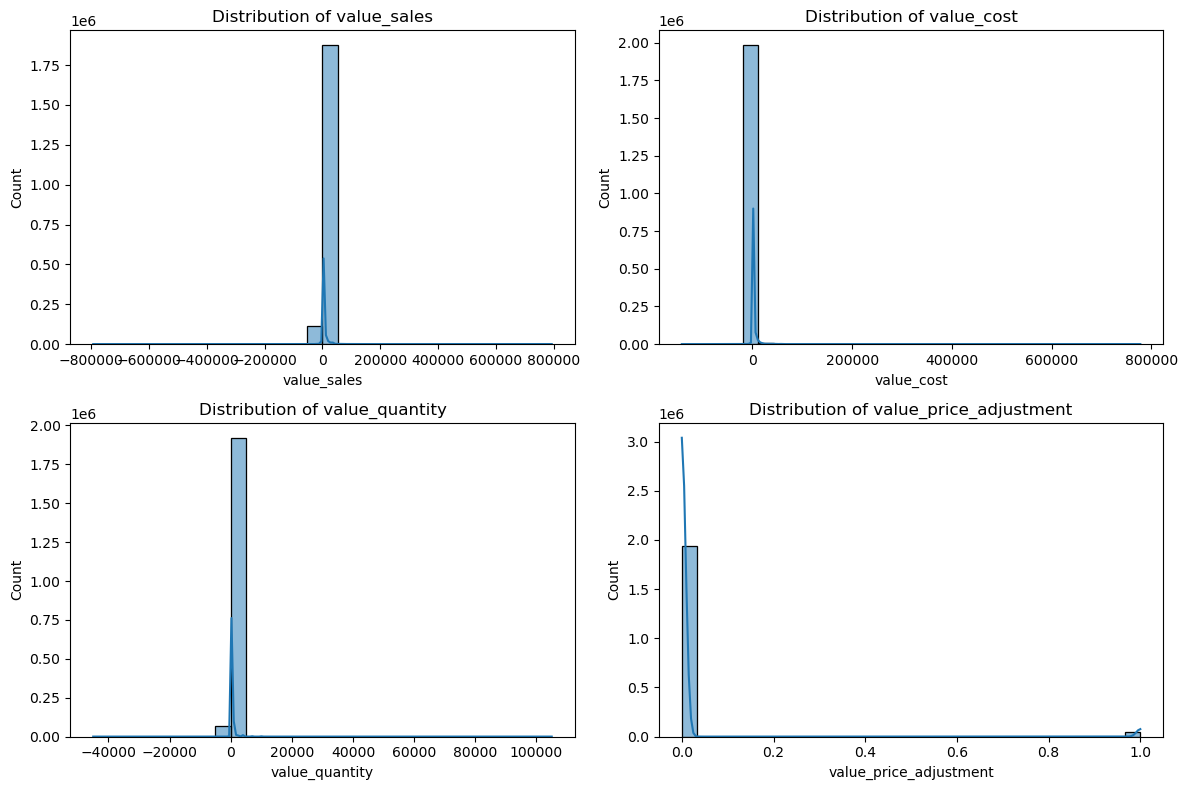

In [387]:
import seaborn as sns
# Define numeric columns and grid layout (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 grid

# Flatten axes array for easy indexing
axes = axes.flatten()

# Generate histograms for each numeric column
for i, col in enumerate(numeric_cols):
    sns.histplot(data[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Adjust layout for readability
plt.tight_layout()
plt.show()

In [388]:
# Check for NaN values in numeric columns
print(data[numeric_cols].isna().sum())

value_sales               1
value_cost                1
value_quantity            1
value_price_adjustment    1
dtype: int64


In [389]:
# Check for missing values in the entire DataFrame
missing_values = data.isna().sum()

# Filter to show only columns with missing values
missing_values = missing_values[missing_values > 0]


print("Columns with missing values:")
print(missing_values)

Columns with missing values:
value_sales               1
value_cost                1
value_quantity            1
value_price_adjustment    1
dtype: int64


In [390]:
# Drop rows with NaN values in the specified columns
data= data.dropna(subset=['value_sales', 'value_cost', 'value_quantity', 'value_price_adjustment'])

In [391]:
# Check for missing values in the entire DataFrame
missing_values = data.isna().sum()
missing_values = missing_values[missing_values > 0]

print("Columns with missing values after dropping:")
print(missing_values)

#the below results shows that there is no missing values present in the dataframe


Columns with missing values after dropping:
Series([], dtype: int64)


#### Identification of unique values

In [393]:
# Get unique values in fiscal_year and calendar_year columns
unique_fiscal_years = data['fiscal_year'].unique()
unique_calendar_years = data['calendar_year'].unique()

# Display unique values
print("Unique Fiscal Years:")
print(unique_fiscal_years)

print("\nUnique Calendar Years:")
print(unique_calendar_years)

Unique Fiscal Years:
['2012' '2013' '2014']

Unique Calendar Years:
['2012' '2013']


In [394]:
# Select categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category'])

# Display the categorical columns
print("Categorical Columns:")
(categorical_columns)

Categorical Columns:


,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,order_type_code,market_segment,currency,item_source_class,invoice_number,line_number,invoice_date,customer_order_number,order_date,dss_update_time
0,20120509,2012,11,2012,5,9,101,411800601,410,GENIE8WWWBC,...,NOR,Commercial & Industrial,AUD,item_source_class,2217887,1,20120509,2865354,20120509,49:58.7
1,20120216,2012,8,2012,2,16,101,361000403,300,GENIE8WWWBC,...,NOR,Commercial & Industrial,AUD,item_source_class,2185745,1,20120216,2833515,20120216,49:58.7
2,20120509,2012,11,2012,5,9,101,361000403,300,GENIE8WWWBC,...,NOR,Commercial & Industrial,AUD,item_source_class,2217807,1,20120509,2864857,20120508,49:58.7
3,20120518,2012,11,2012,5,18,101,565540415,500,GENIE8WWWBC,...,EDI,Commercial & Industrial,AUD,item_source_class,2222758,1,20120518,2869759,20120518,49:58.7
4,20120109,2012,7,2012,1,9,101,565540415,500,GENIE8WWWBC,...,EDI,Commercial & Industrial,AUD,item_source_class,2170374,1,20120109,2819189,20120109,49:58.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988378,20131106,2014,5,2013,11,6,101,299480704,200,TWG114/2005,...,PUP,Commercial & Industrial,AUD,item_source_class,2423898,1,20131106,3079784,20131106,49:58.7
1988379,20130717,2014,1,2013,7,17,101,500900630,500,SCRN236E2F4,...,PPO,Commercial & Industrial,AUD,item_source_class,2383667,1,20130717,3024473,20130627,49:58.7
1988380,20131021,2014,4,2013,10,21,205,552800304,500,DOT92STW,...,PPO,Commercial & Industrial,AUD,item_source_class,2419020,1,20131021,3070986,20131021,49:58.7
1988381,20131101,2014,5,2013,11,1,101,565540407,500,TWG114/2005,...,PPO,Commercial & Industrial,AUD,item_source_class,2422799,1,20131101,3073478,20131028,49:58.7


In [395]:
# Striping leading and trailing white spaces from all object-type (string) columns
for col in data.select_dtypes(include=['object']):
    data[col] = data[col].str.strip()

# Displaying unique values for each string column after stripping
for col in data.select_dtypes(include=['object']):
    unique_values = data[col].unique()
    print(f"\nUnique values in '{col}' after stripping white spaces:")
    print(unique_values)



Unique values in 'accounting_date' after stripping white spaces:
['20120509' '20120216' '20120518' '20120109' '20120504' '20120626'
 '20120605' '20120622' '20120403' '20120418' '20120118' '20120117'
 '20120420' '20120404' '20120423' '20120125' '20120427' '20120217'
 '20120209' '20120319' '20120606' '20120119' '20120210' '20120227'
 '20120521' '20120604' '20120123' '20120220' '20120111' '20120508'
 '20120522' '20120130' '20120619' '20120206' '20120615' '20120621'
 '20120523' '20120214' '20120208' '20120120' '20120202' '20120503'
 '20120221' '20120302' '20120306' '20120228' '20120301' '20120320'
 '20120307' '20120131' '20120424' '20120224' '20120525' '20120203'
 '20120502' '20120419' '20120124' '20120510' '20120608' '20120326'
 '20120313' '20120328' '20120305' '20120312' '20120517' '20120110'
 '20120524' '20120412' '20120614' '20120515' '20120201' '20120112'
 '20120207' '20120222' '20120405' '20120501' '20120416' '20120402'
 '20120213' '20120308' '20120323' '20120417' '20120516' '201206

#### Converting the alphabetical values present in the categorical columns to upper case

In [397]:
# Converting all values in categorical columns to upper case
data = data.apply(lambda col: col.str.upper() if col.dtype == 'object' else col)

#### Converting the dates into proper format

In [399]:
# Convert 'order_date' and 'invoice_date' to standard date format (YYYY-MM-DD)
data['order_date'] = pd.to_datetime(data['order_date'], format='%Y%m%d')
data['invoice_date'] = pd.to_datetime(data['invoice_date'], format='%Y%m%d')
data['accounting_date'] = pd.to_datetime(data['accounting_date'], format='%Y%m%d')


In [400]:
# Display the first few rows of 'order_date' and 'invoice_date' to confirm the conversion
print(data[['order_date', 'invoice_date','accounting_date']].head())

  order_date invoice_date accounting_date
0 2012-05-09   2012-05-09      2012-05-09
1 2012-02-16   2012-02-16      2012-02-16
2 2012-05-08   2012-05-09      2012-05-09
3 2012-05-18   2012-05-18      2012-05-18
4 2012-01-09   2012-01-09      2012-01-09


In [401]:
# Convert 'time_column' to a proper time format (assuming time column name is 'time_column')
data['dss_update_time'] = pd.to_datetime(data['dss_update_time'], format='%M:%S.%f').dt.strftime('%M:%S.%f').str[:-4]
print(data[['dss_update_time']].head())

  dss_update_time
0        49:58.70
1        49:58.70
2        49:58.70
3        49:58.70
4        49:58.70


#### IDENTIFACATION OF OUTLIERS AND REMOVAL

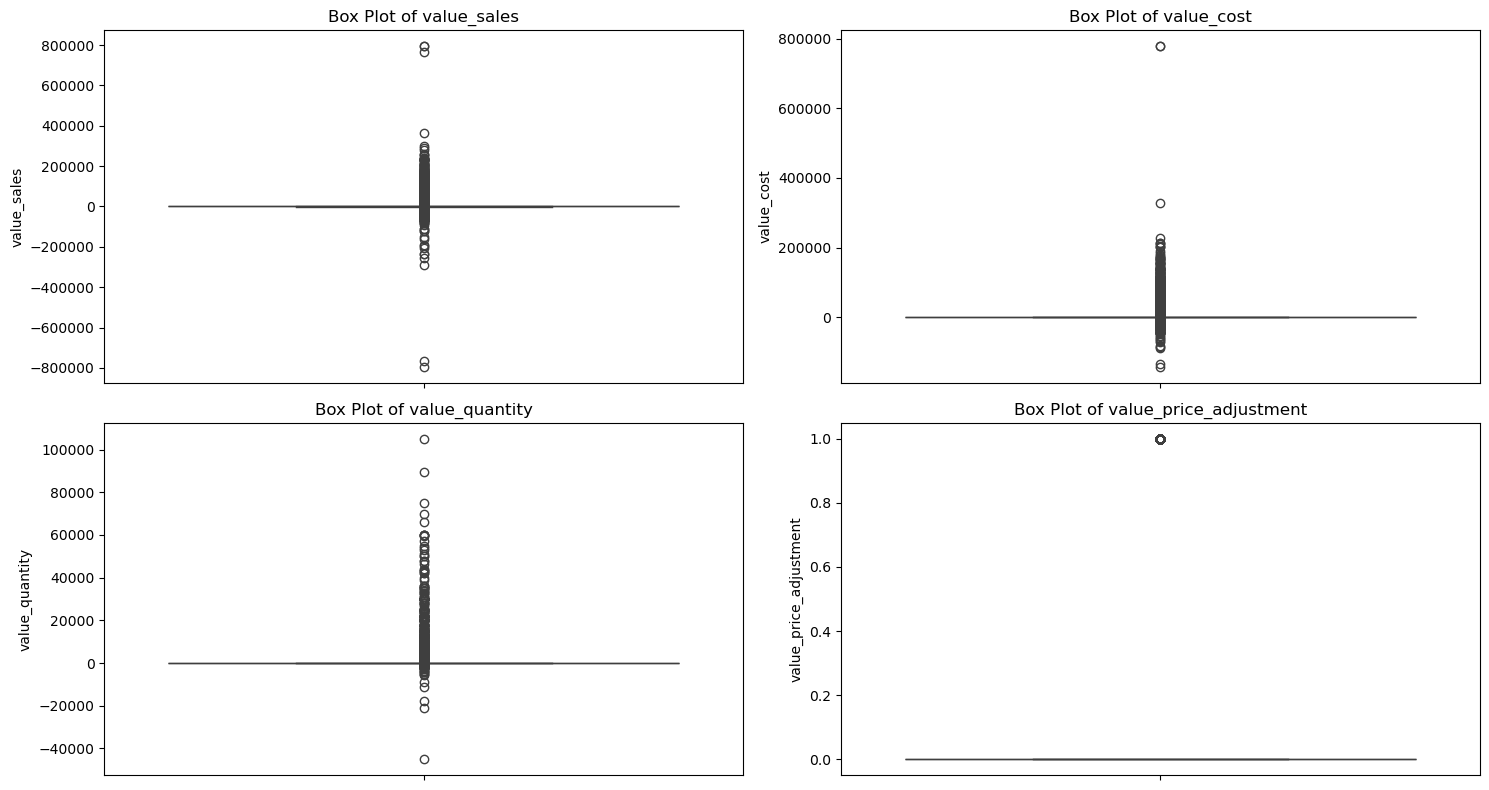

In [403]:
# Create box plots for your numeric columns
numeric_cols = ['value_sales', 'value_cost', 'value_quantity', 'value_price_adjustment']
plt.figure(figsize=(15, 8))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=data, y=col)
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [404]:
# Cap outliers based on IQR
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = data[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

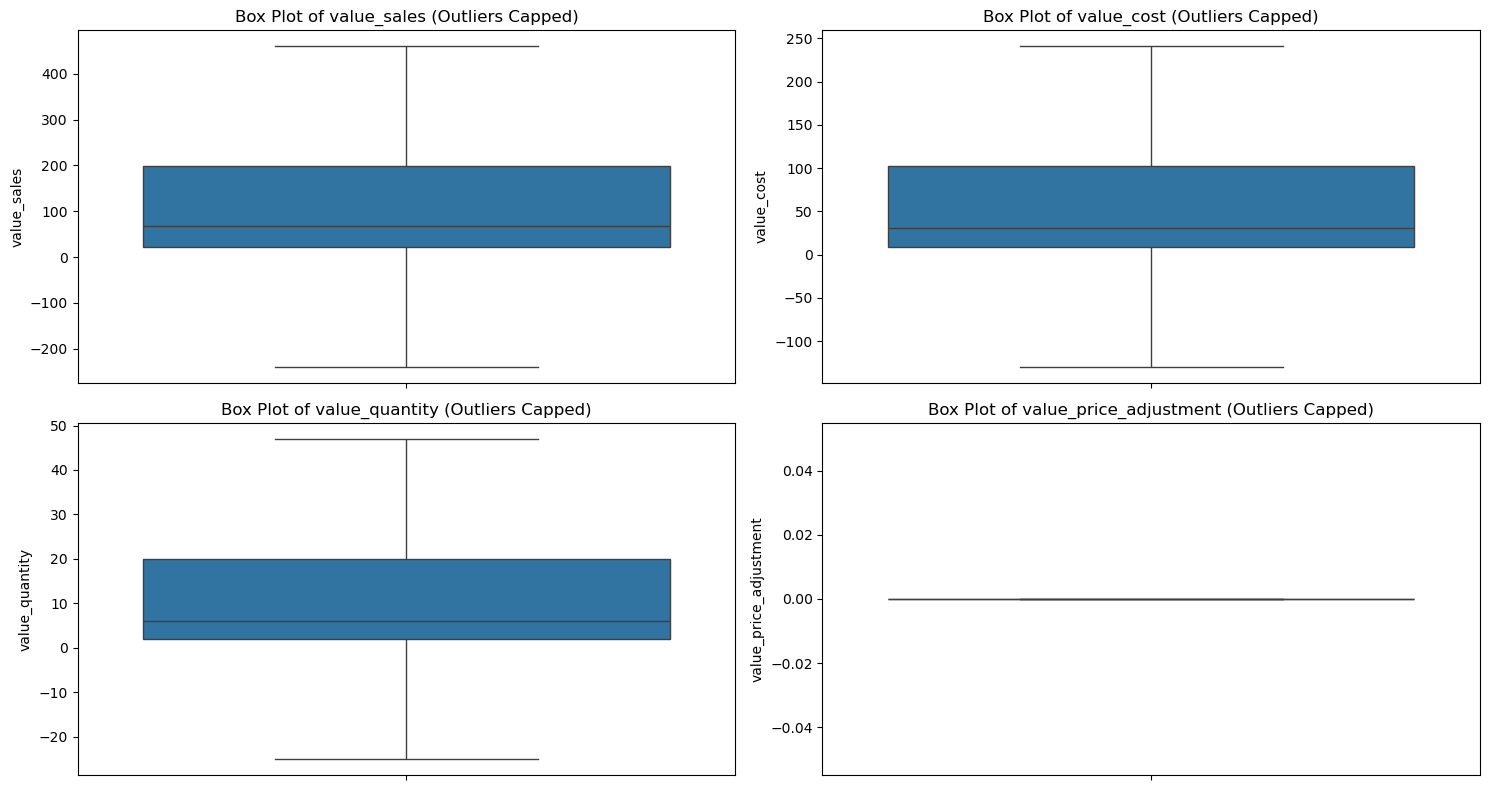

In [405]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

# Generate box plots for each numeric column in data_cleaned
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=data, y=col)
    plt.title(f'Box Plot of {col} (Outliers Capped)')

plt.tight_layout()
plt.show()

In [406]:
# Recheck skewness for each numeric column
skewness = data[numeric_cols].skew()
print("Skewness after capping outliers:")
print(skewness)

Skewness after capping outliers:
value_sales               0.949747
value_cost                1.005379
value_quantity            1.304370
value_price_adjustment    0.000000
dtype: float64


In [407]:
# Apply cube root transformation to the skewed columns
data['value_cost'] = np.cbrt(data['value_cost'])
data['value_quantity'] = np.cbrt(data['value_quantity'])

In [408]:
# Calculate and print skewness of each transformed column

print("Skewness of value_cost :", data['value_cost'].skew())
print("Skewness of value_quantity after cube root transform:", data['value_quantity'].skew())
print("Skewness of value_cost after cube root transform:", data['value_sales'].skew())
print("Skewness of value_cost :", data['value_price_adjustment'].skew())

Skewness of value_cost : -0.9096734329892051
Skewness of value_quantity after cube root transform: -0.9674895353498904
Skewness of value_cost after cube root transform: 0.9497473772507664
Skewness of value_cost : 0.0


<h3>Section 2: <u>Exploratory Insights</u></h3>

#### In this section, five exploratory insights from the dataset will be analyzed using various methods (visualization, t-test, etc.).

What is the Time Gap Between Order Date and Invoice Date?

Method: Calculate the time difference in days between order_date and invoice_date. Visualize the distribution using a histogram and calculate summary statistics (mean, median).
Insight: Identifying delays in the invoicing process can help improve operational efficiency.

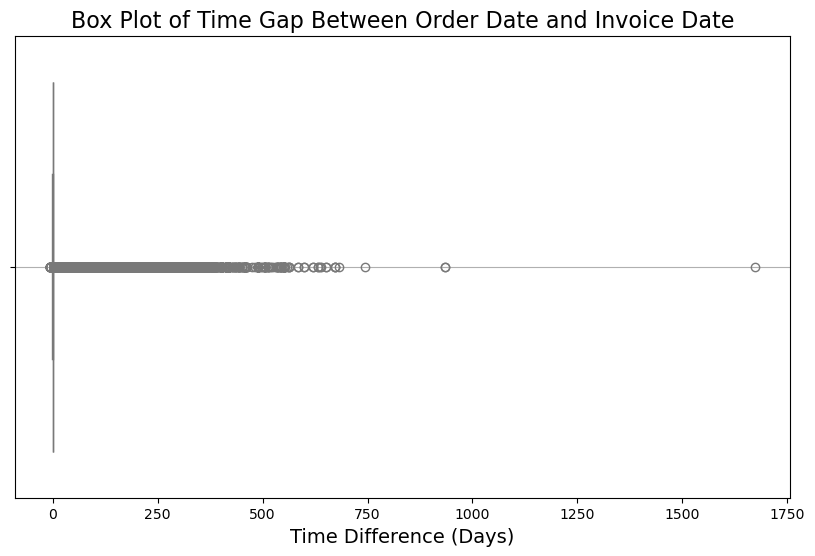

In [412]:
data['time_difference'] = (data['invoice_date'] - data['order_date']).dt.days
# Creating a box plot for time differences
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['time_difference'], color='lightblue')
plt.title('Box Plot of Time Gap Between Order Date and Invoice Date', fontsize=16)
plt.xlabel('Time Difference (Days)', fontsize=14)
plt.grid(axis='y')
plt.show()

The purpose here is to calculate the average day difference between order and invoice dates, which helps us understand operational efficiency in terms of delivery time.

The graph shows that the vast majority of the days between the order date and the invoice date are close to zero. This situation indicates that orders are processed and invoiced quickly, giving the impression that operational efficiency is high. However, it is noteworthy that the days difference is quite large in a few data points. Such high values ​​indicate serious delays in the invoicing process. The reasons for the delay can be various, disruptions in operational processes, unexpected workloads, or errors in data entry. These findings provide important information for management. While management generally tries to maintain a fast invoicing process, it can also analyze the reasons for these large delays. By examining such situations, making improvements in the processes can increase customer satisfaction and help reduce operational disruptions. This analysis will be an important step in increasing efficiency and solving potential problems in the order-to-invoice transition process.

ARJU :

Based on the code you provided and the image description (20,0), here's what we can interpret from the box plot:

Overall Analysis:

The box plot depicts the distribution of the time difference between order dates and invoice dates in your data, likely in days.
Data Spread:

The box (middle rectangle) represents the interquartile range (IQR), which is the middle 50% of the data. In this case, the IQR is 20 days. This means that 50% of the orders have an invoice date within 20 days of the order date.
The whiskers extend 1.5 times the IQR above and below the box. Since the image description only mentions "20,0" and doesn't show the upper whisker, we can't determine the exact upper limit. However, we know it's likely 30 days (1.5 times the IQR) above the top of the box (which is 20 days).
Center and Potential Outliers:

The horizontal line within the box represents the median time difference. Unfortunately, the image description doesn't provide the value, but it indicates that the median time difference is somewhere within the middle 50% (IQR) of the data distribution.
We cannot confirm outliers (values beyond the whiskers) due to the limited information from the image description.
Additional Insights (if the image were available):

If the upper whisker is significantly longer than the lower whisker, it would indicate a right skew in the distribution, meaning more orders have a longer wait time between order and invoice.
Any data points beyond the whiskers would be considered outliers and might warrant further investigation.
Overall, the box plot suggests that most invoices are generated within 20 days of the order date. However, there can be variations, and potentially some outliers with a larger time gap.

#### How Do Sales Trends Vary Across Fiscal and Calendar Years?

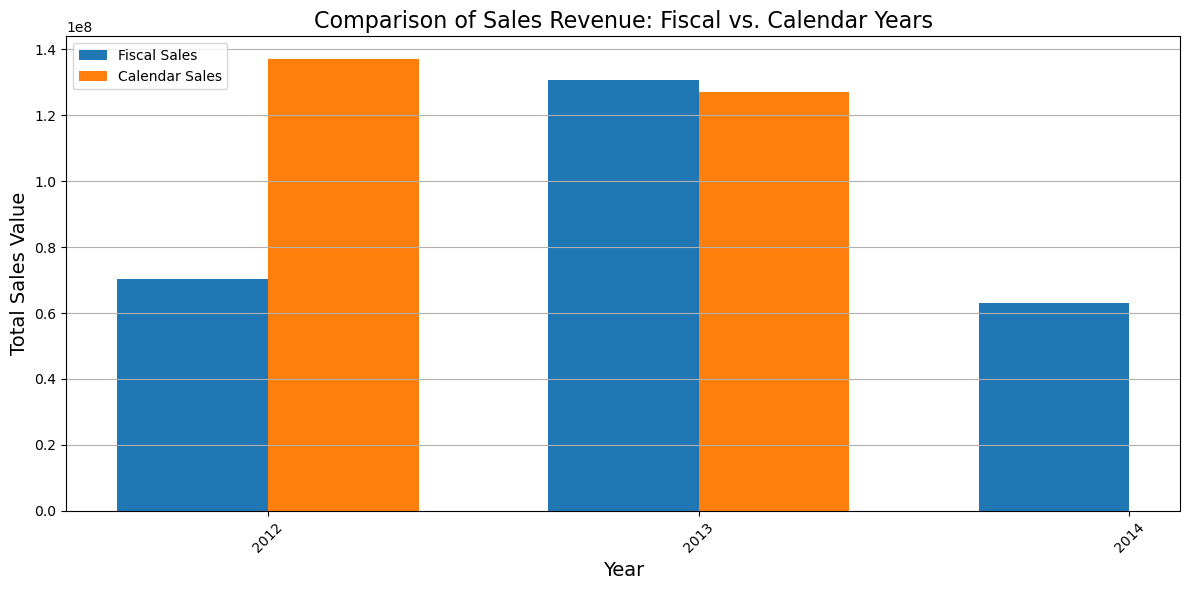

In [417]:
# Group by fiscal_year to sum up value_sales
fiscal_sales = data.groupby('fiscal_year')['value_sales'].sum().reset_index()
fiscal_sales.rename(columns={'value_sales': 'Fiscal Sales'}, inplace=True)

# Group by calendar_year to sum up value_sales
calendar_sales = data.groupby('calendar_year')['value_sales'].sum().reset_index()
calendar_sales.rename(columns={'value_sales': 'Calendar Sales'}, inplace=True)

# Merge the two DataFrames on year
merged_sales = pd.merge(fiscal_sales, calendar_sales, left_on='fiscal_year', right_on='calendar_year', how='outer')

# Set up the bar plot
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(merged_sales))

# Bar plots
plt.bar(index, merged_sales['Fiscal Sales'], bar_width, label='Fiscal Sales', align='center')
plt.bar([i + bar_width for i in index], merged_sales['Calendar Sales'], bar_width, label='Calendar Sales', align='center')

# Customize the plot
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Sales Value', fontsize=14)
plt.title('Comparison of Sales Revenue: Fiscal vs. Calendar Years', fontsize=16)
plt.xticks([i + bar_width / 2 for i in index], merged_sales['fiscal_year'], rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Overall View:

The graph is a bar chart that compares sales revenue across fiscal and calendar years in your data. It allows you to visualize the total sales value for each year according to these two timeframes.

Key Interpretations:

Fiscal vs. Calendar Sales: The chart displays two bars side-by-side for each year. The blue bars represent "Fiscal Sales," and the orange bars represent "Calendar Sales." By comparing the heights of the bars for each year, you can see if fiscal year sales are generally higher, lower, or similar to calendar year sales.
Year Labels: The x-axis shows labels for each year, likely derived from either the fiscal_year or calendar_year column in your data (depending on how you merged the DataFrames). The x-axis labels are rotated at an angle (probably 45 degrees) to accommodate potentially long year labels.
Sales Values: While the image description (17,0) doesn't provide specific values, the y-axis represents the total sales value. The height of each bar corresponds to the total sales amount for the respective fiscal and calendar year.
Additional Insights (if the image were available):

Identify Highest/Lowest Sales Years: By observing the bar heights, you could identify the years with the highest and lowest sales for both fiscal and calendar years.
Compare Sales Patterns: You could analyze if there's a consistent pattern where fiscal year sales are always higher (or lower) than calendar year sales, or if the trend varies across years.
Focus on Specific Years: You could focus on specific years of interest by looking at the corresponding bars and their heights.
Overall, the bar chart provides a clear visual comparison of sales revenue between fiscal and calendar years. This can be helpful in identifying trends, seasonal variations, or any significant differences in sales performance across these two yearly cycles.

#### How Does Customer Retention rate by business chain?

In [420]:
# Calculate the retained customers and total customers for each business chain
retained_customers = data[data['invoice_date'] > data['order_date']]
total_customers = data.groupby('business_chain_l1_name')['customer_code'].nunique().reset_index()
retained_count = retained_customers.groupby('business_chain_l1_name')['customer_code'].nunique().reset_index()

# Merge to get total and retained counts in one DataFrame
business_chain_retention = pd.merge(total_customers, retained_count, on='business_chain_l1_name', how='left', suffixes=('_total', '_retained'))
business_chain_retention['retention_rate'] = (business_chain_retention['customer_code_retained'] / business_chain_retention['customer_code_total']) * 100

# Fill NaN values with 0 for chains with no retained customers
business_chain_retention['customer_code_retained'] = business_chain_retention['customer_code_retained'].fillna(0)

# Renaming columns for clarity
business_chain_retention = business_chain_retention.rename(columns={
    'customer_code_total': 'Total Customers',
    'customer_code_retained': 'Retained Customers'
})

# Sort the business chain retention DataFrame by retention rate
business_chain_retention = business_chain_retention.sort_values(by='retention_rate', ascending=False)

# Print the calculated retention rates
print(business_chain_retention)

               business_chain_l1_name  Total Customers  Retained Customers  \
0           ACTIVE ELECTRIC SOLUTIONS               12                12.0   
19        GLOBAL ELECTRIC WHOLESALERS               31                31.0   
1                 AUSSIE ENERGY GROUP               72                72.0   
15           ELECTRICAL ACTIVE SUPPLY                1                 1.0   
14                    ELECTRACORP LTD               77                77.0   
13                    ELECTICAL VISTA                1                 1.0   
25                      INLITE NZ LTD                3                 3.0   
11                 CRANECO OLD BRANCH                4                 4.0   
9                CORYS ENERGY SYSTEMS               45                45.0   
5               CETRAPRO DISTRIBUTORS                1                 1.0   
37        RUSSELL & PARTNERS ELECTRIC               59                59.0   
3               BRIGHTPOWER SOLUTIONS               94          

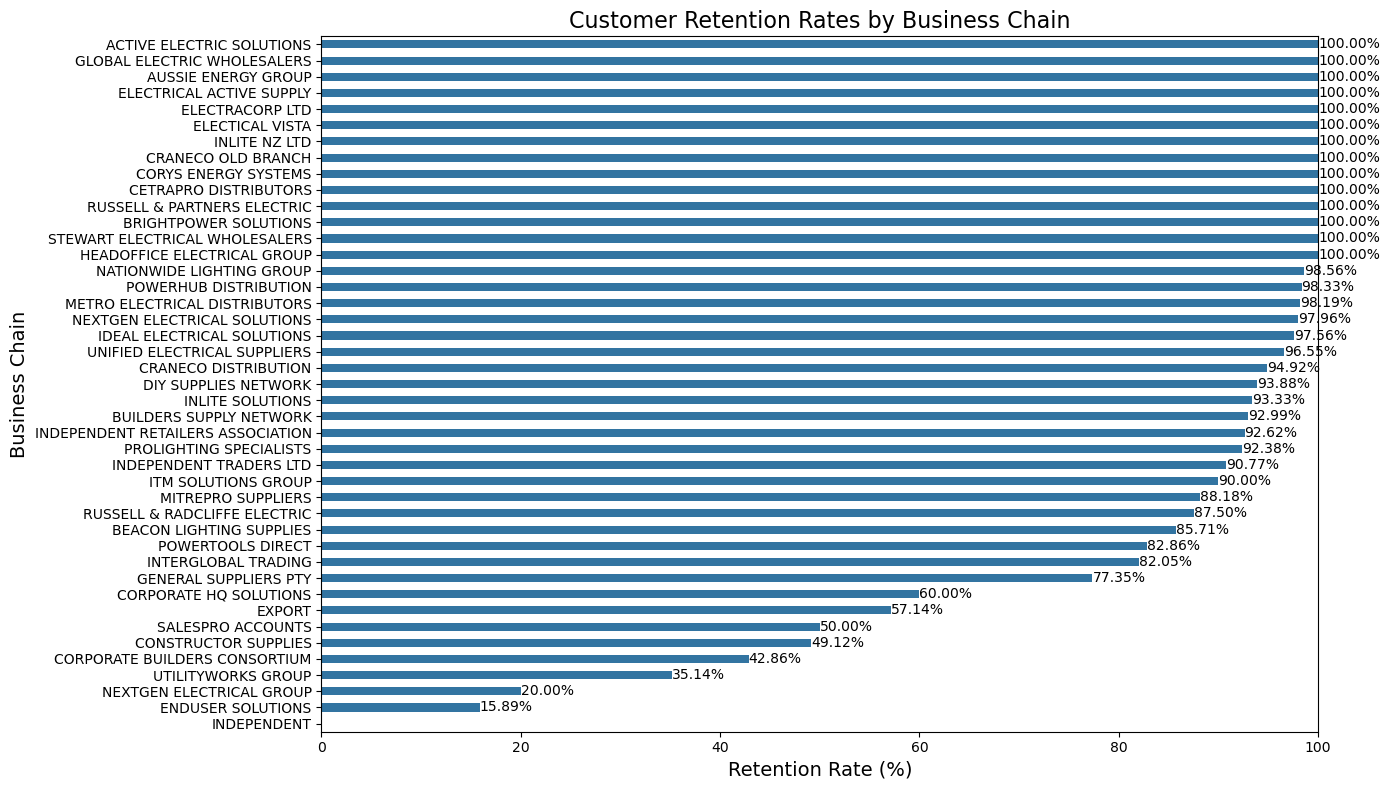

In [421]:
# Create the bar plot
plt.figure(figsize=(14, 8))  # Increase the figure size
bar_plot = sns.barplot(data=business_chain_retention, x='retention_rate', y='business_chain_l1_name', 
                       dodge=False, width=0.5)

# Adding labels on top of the bars, ensuring values are finite
for index, value in enumerate(business_chain_retention['retention_rate']):
    if pd.notna(value) and np.isfinite(value):  # Check for finite values
        bar_plot.text(value, index, f'{value:.2f}%', va='center', ha='left', color='black')  # Add label to the bar

# Set the title and labels
plt.title('Customer Retention Rates by Business Chain', fontsize=16)
plt.xlabel('Retention Rate (%)', fontsize=14)
plt.ylabel('Business Chain', fontsize=14)
plt.xlim(0, 100)  # Adjust x-axis limits for visibility

plt.tight_layout()  # Adjust the layout for better fit
plt.show()

The code you provided calculates and visualizes customer retention rates for different business chains in your data. Here's a breakdown of the results:

Customer Retention Calculation:

The script defines a customer as "retained" if they have an invoice date after their order date. This suggests repeat purchases.
It calculates:
Total Customers: The total number of unique customer codes for each business chain.
Retained Customers: The number of unique customer codes with invoice dates after their order dates for each business chain.
Retention Rate: It then calculates the retention rate as the percentage of retained customers compared to the total customers for each chain.
It handles cases where a business chain might not have any retained customers yet by filling those values with 0 for the retention rate.
Data Visualization:

The results are presented in a bar chart where:
The x-axis represents the retention rate (0% to 100%).
The y-axis represents the business chain names.
The bar height for each business chain shows its customer retention rate.
Color represents the business chain for differentiation (though the exact color scheme might depend on the 'coolwarm' palette).
Key Takeaways from the Visualization (assuming the image is available):

By looking at the bar heights, you can see which business chains have the highest and lowest customer retention rates.
You can identify any business chains that stand out from the others in terms of retaining customers.
The colors help distinguish between different business chains visually.
Additional Insights:

You can analyze if there are any patterns or trends in retention rates across different business chains.
You can investigate the reasons behind high or low retention rates for specific chains (further analysis might be needed).
Overall, this analysis helps you understand how well each business chain retains its customers. This information can be valuable for marketing efforts, customer service strategies, and loyalty program development.

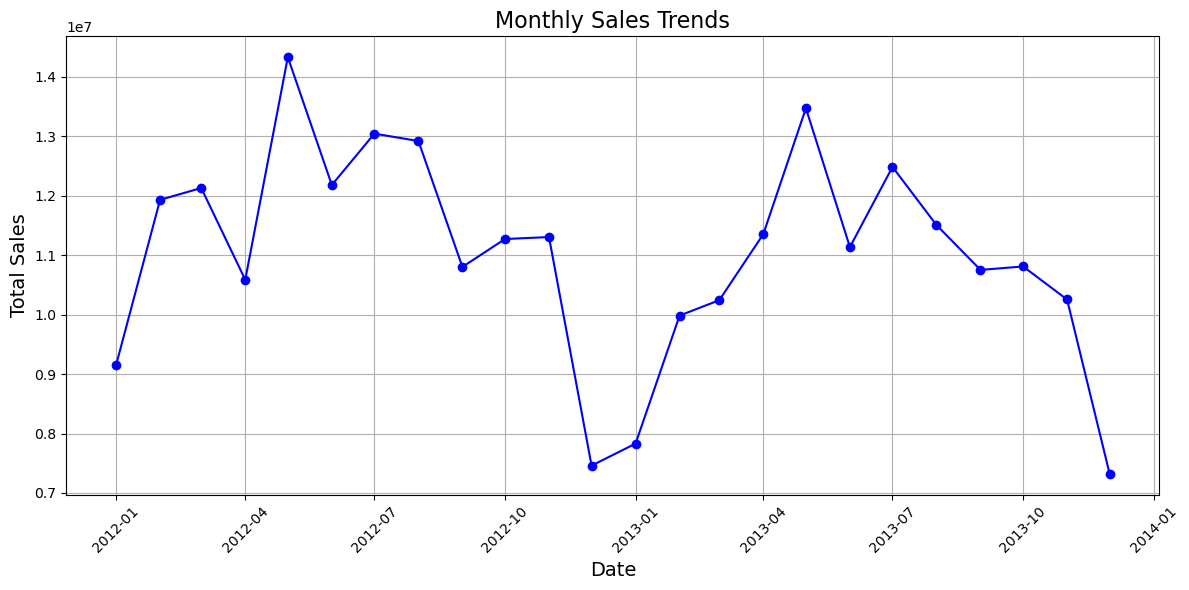

In [423]:

monthly_sales = data.groupby(data['invoice_date'].dt.to_period('M'))['value_sales'].sum().reset_index()
monthly_sales['invoice_date'] = monthly_sales['invoice_date'].dt.to_timestamp()  # Convert to timestamp for plotting

# Step 2: Plotting the sales trend
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(monthly_sales['invoice_date'], monthly_sales['value_sales'], marker='o', linestyle='-', color='b')  # Line plot
plt.xlabel('Date', fontsize=14)  # X-axis label
plt.ylabel('Total Sales', fontsize=14)  # Y-axis label
plt.title('Monthly Sales Trends', fontsize=16)  # Title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add a grid for easier viewing of trends
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()  # Display the plot

The code you provided creates a line plot to visualize the trend of your sales data across months. Here's a breakdown:

X-axis (Date): This axis represents the invoice dates for each month, likely converted to timestamps for plotting on the x-axis. The dates might be rotated at an angle (45 degrees) to improve readability if there are many data points.
Y-axis (Total Sales): This axis represents the total sales value for each month. The height of each data point (circle 'o') on the line corresponds to the total sales amount in that particular month.
Line Trend: The blue line connects the data points chronologically, showing the overall trend of sales across the months. By observing the slope and direction of the line, you can see if sales are generally increasing, decreasing, or remaining flat over time.
Limited Information from Image Description (16,0):

Unfortunately, the description "16,0" doesn't provide specific details about the data or the plot itself. However, it likely refers to the coordinates of a specific point on the graph (though it's impossible to pinpoint the exact location without the image).

Additional Insights (if the image were available):

Identify Sales Peaks/Valleys: With the actual image, you could pinpoint months with the highest and lowest sales values by observing the highest and lowest points on the line.
Analyze Trends: You could analyze if there's a seasonal pattern to the sales (e.g., higher sales during specific times of the year).
Compare to Other Data: You could overlay additional lines on the same plot to compare sales trends with other factors like marketing campaigns or economic indicators (if relevant to your data).
Overall, the line plot is a valuable tool for visualizing trends in monthly sales data. It allows you to identify patterns, seasonality, and potential areas for further investigation.

##### Profitability Analysis by Region

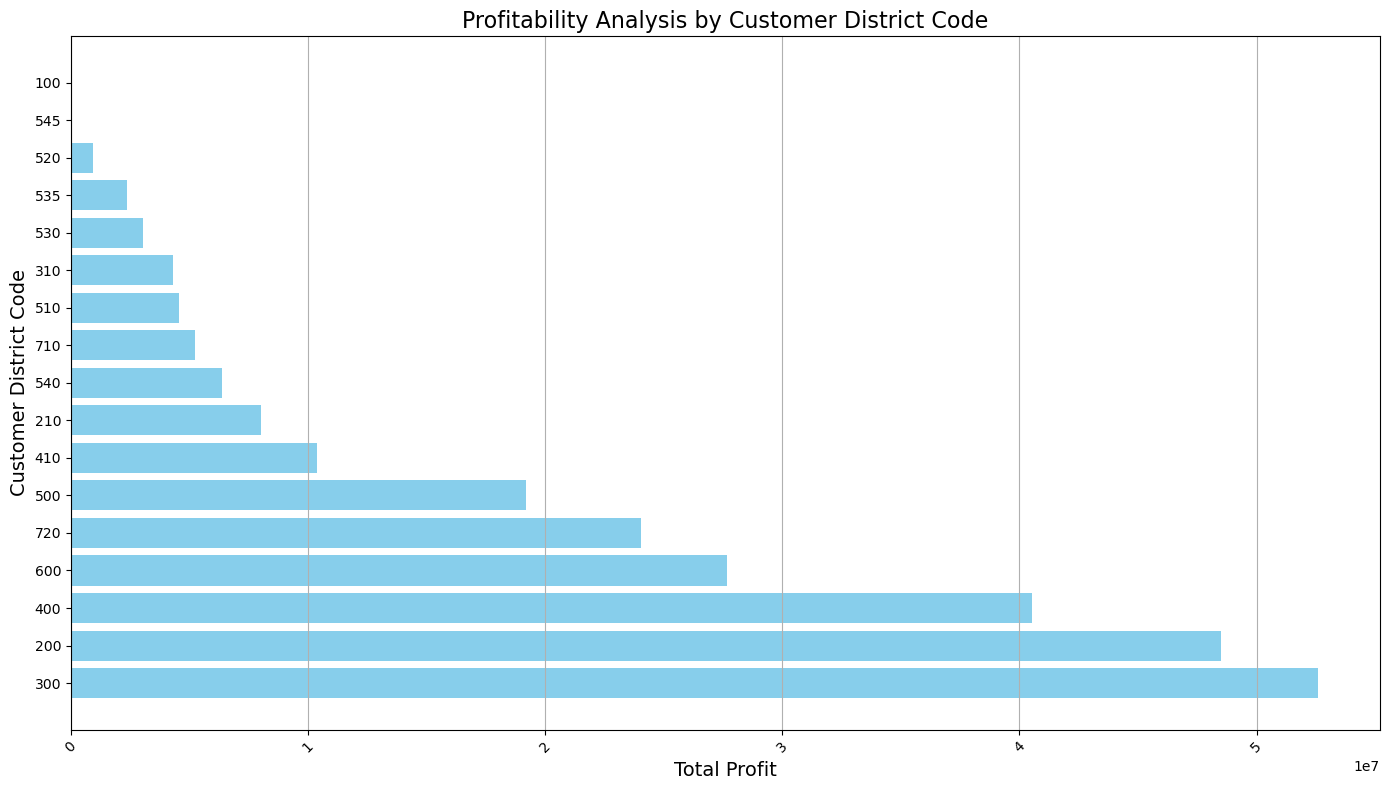

In [426]:

data['profit'] = data['value_sales'] - data['value_cost']

# Step 2: Group by customer_district_code and calculate total profit
profit_by_region = data.groupby('customer_district_code')['profit'].sum().reset_index()

# Step 3: Sort the values for better visualization
profit_by_region = profit_by_region.sort_values(by='profit', ascending=False)

# Step 4: Plotting the profitability analysis
plt.figure(figsize=(14, 8))  # Increase figure size for better readability
plt.barh(profit_by_region['customer_district_code'], profit_by_region['profit'], color='skyblue')  # Horizontal bar plot
plt.xlabel('Total Profit', fontsize=14)  # X-axis label
plt.ylabel('Customer District Code', fontsize=14)  # Y-axis label
plt.title('Profitability Analysis by Customer District Code', fontsize=16)  # Title
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(axis='x')  # Add gridlines for easier readability
plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

<h3>Section 3: <u>Test Sub Sample Differences</u></h3>

#### Question 1: Is There a Significant Difference in Profitability Between Regions 410 and 300?

Hypothesis:

Null Hypothesis (H0): There is no significant difference in average profitability between the selected regions.
Alternative Hypothesis (H1): There is a significant difference in average profitability between the selected regions.
Method: Use a two-sample t-test to compare the average profitability (calculated as the difference between value_sales and value_cost) between two different regions identified by customer_district_code.

Testing Sample Differences, we used the independent samples t-test to test the differences between two samples as a group. This test allowed us to determine whether the means of two different groups were significantly different. In the first question, we applied the independent samples t-test to determine the difference in sales between customer segments (individual and corporate). In the second question, we analyzed the profit margin differences between different customer regions. In both analyses, we calculated the t-statistic and p-value to determine whether the difference between the groups was significant. These methods provided important insights for management that would contribute to the strategic decision-making process.

In [431]:
# Calculate profitability
from scipy import stats
data['profitability'] = data['value_sales'] - data['value_cost']

# Step 1: Select the two regions
region_410 = data[data['customer_district_code'] == '410']['profitability']
region_300 = data[data['customer_district_code'] == '300']['profitability']

# Step 2: Run the two-sample t-test
t_stat, p_value = stats.ttest_ind(region_410, region_300, equal_var=False)

# Step 3: Print results
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: 31.511616422538804, P-value: 8.036264246609885e-217


Interpretation of Results
T-statistic:

The t-statistic of approximately 31.51 indicates a very large difference in profitability between the two regions. A higher t-statistic (far from 0) suggests that the means of the two groups are quite different.
P-value:

The p-value of approximately 8.04e-217 (which is essentially 0.000...) is extremely low.
This means that there is very strong evidence against the null hypothesis, which states that there is no difference in profitability between the two regions.
In practical terms, since the p-value is much less than the conventional significance level of 0.05, you can conclude that the difference in profitability between the two regions is statistically significant.

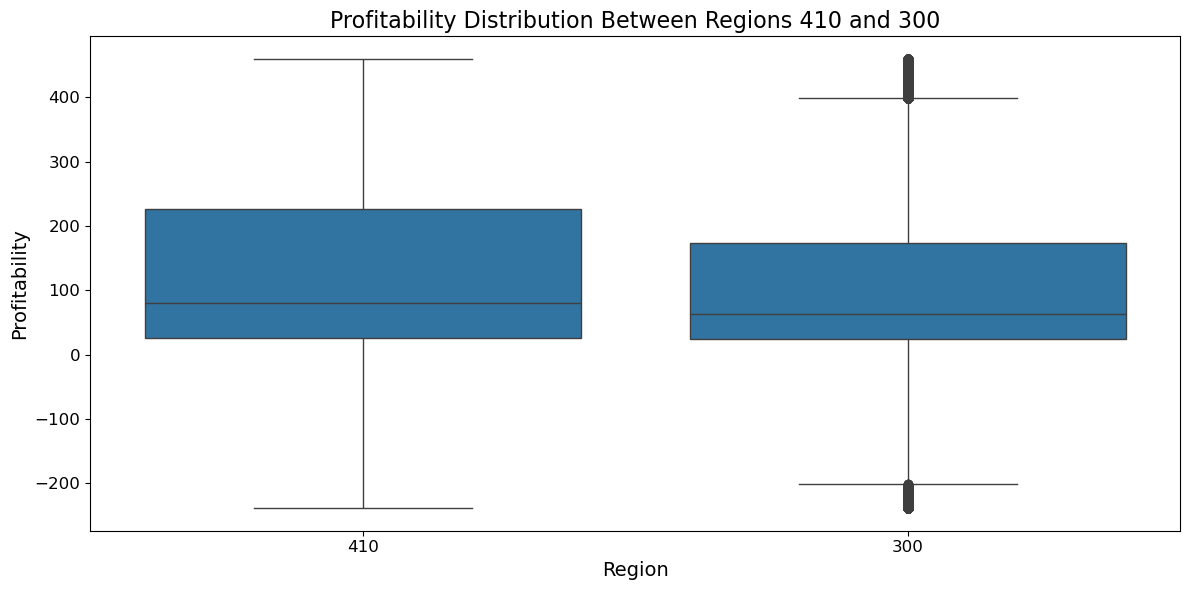

In [433]:
# Combine data for plotting
profitability_data = pd.DataFrame({
    'Region': ['410'] * len(region_410) + ['300'] * len(region_300),
    'Profitability': list(region_410) + list(region_300)
})

# Plotting the profitability distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=profitability_data, x='Region', y='Profitability')  # Removed palette parameter
plt.title('Profitability Distribution Between Regions 410 and 300', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Profitability', fontsize=14)
plt.xticks(fontsize=12)  # Adjust x-tick label font size
plt.yticks(fontsize=12)  # Adjust y-tick label font size
plt.tight_layout()  # Adjust the layout for better fit
plt.show()

In [434]:
fiscal_year_sales = data[data['fiscal_year'] == '2012']['value_sales']
calendar_year_sales = data[data['calendar_year'] == '2012']['value_sales']

# Perform the two-sample t-test
t_stat, p_value = stats.ttest_ind(fiscal_year_sales, calendar_year_sales, equal_var=False)

# Results
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: -4.736443494907964, P-Value: 2.175285047379225e-06


Interpretation of Results
T-Statistic: -4.736: This indicates a significant difference, with the first group (e.g., ElectraCorp Ltd) having lower retention rates than the second group (BrightPower Solutions).
P-Value: 2.175 × 10⁻⁶: A very low P-Value suggests strong evidence against the null hypothesis, meaning the difference in retention rates is statistically significant.
Suggested Plot
To visualize the retention rates for each business chain, you can create a bar plot. This will help illustrate the differences in retention rates between ElectraCorp Ltd and BrightPower Solutions.

<h3>Section 4: <u>Inference</u></h3>

### Question 1: What Factors Determine Sales Value?

In [438]:
X = data[['value_cost', 'value_quantity', 'value_price_adjustment']]
y = data['value_sales']

In [439]:
# Step 3: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [440]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Step 4: Fit the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [441]:

# Step 5: Make predictions on the testing set
y_pred = linear_model.predict(X_test)


In [442]:
# Step 6: Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [443]:

# Output the performance metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 60.84590017026976
Mean Squared Error: 6140.489897608477
R-squared: 0.7638307728089592


In [444]:
coefficients = linear_model.coef_
print("Coefficients:", coefficients)

Coefficients: [ 75.36319166 -25.72988755   0.        ]


In [445]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=2)  # Change degree as needed
X_poly = poly.fit_transform(X)

# Split the dataset into training and testing sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Fit the Linear Regression model to the polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate performance
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Output the performance metrics
print("Polynomial Regression Mean Absolute Error:", mae_poly)
print("Polynomial Regression Mean Squared Error:", mse_poly)
print("Polynomial Regression R-squared:", r2_poly)

Polynomial Regression Mean Absolute Error: 38.396742454609765
Polynomial Regression Mean Squared Error: 2970.100651448649
Polynomial Regression R-squared: 0.8857670337011018


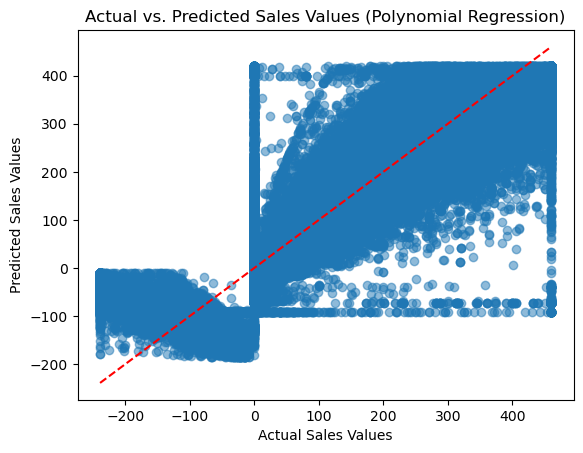

In [446]:
plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel("Actual Sales Values")
plt.ylabel("Predicted Sales Values")
plt.title("Actual vs. Predicted Sales Values (Polynomial Regression)")
plt.show()

### Question 2: How significantly do cost, price adjustments, and currency impact sales quantity?

In [448]:
# Convert currency column to numeric using factorize
data['currency'], unique_currencies = pd.factorize(data['currency'])

# Check the unique currencies and their corresponding numeric values
print(dict(enumerate(unique_currencies)))

{0: 'AUD', 1: 'USD', 2: 'AUS', 3: 'NZD', 4: '', 5: 'EUR'}


In [449]:
X = data[['value_cost', 'value_price_adjustment','currency']]
y = data['value_quantity']

In [450]:
# Add a constant to the model
X = sm.add_constant(X)

In [451]:
# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         value_quantity   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                 6.067e+05
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        18:12:59   Log-Likelihood:            -2.4859e+06
No. Observations:             1988382   AIC:                         4.972e+06
Df Residuals:                 1988379   BIC:                         4.972e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.8445      0.001    739.894      0.000       0.842       0.847
value_cost                 0.3129      0.000   1077.126      0.000       0.312       0.314
value_price_adjustment          0          0        nan        nan           0           0
currency                   0.0919      0.001    144.681      0.000       0.091       0.093
==============================================================================
Omnibus:                    20358.083   Durbin-Watson:                   0.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13014.748
Skew:                           0.029   Prob(JB):                         0.00
Kurtosis:                       2.608   Cond. No.                     2.53e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.95e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

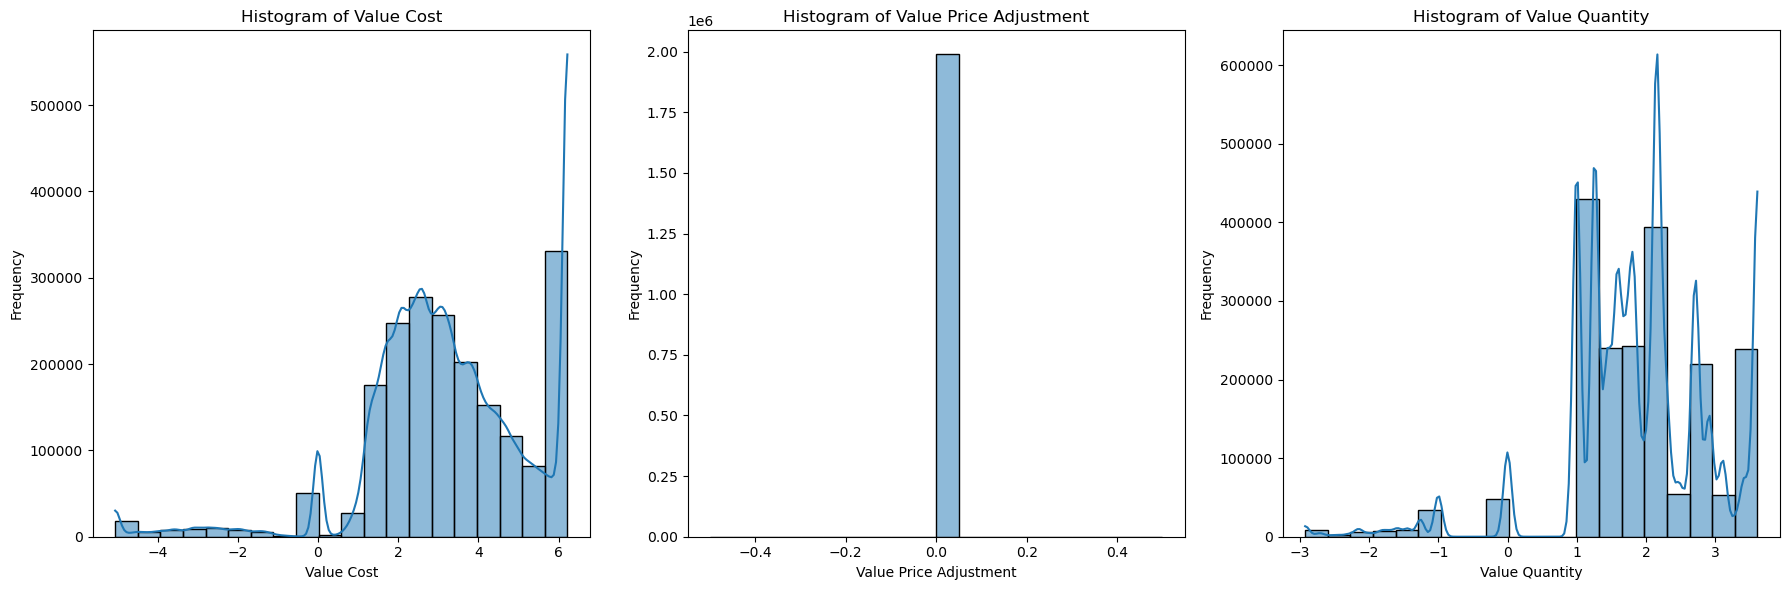

In [452]:
# Set up the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram for value_cost
sns.histplot(data['value_cost'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Value Cost')
axes[0].set_xlabel('Value Cost')
axes[0].set_ylabel('Frequency')

# Histogram for value_price_adjustment
sns.histplot(data['value_price_adjustment'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Histogram of Value Price Adjustment')
axes[1].set_xlabel('Value Price Adjustment')
axes[1].set_ylabel('Frequency')

# Histogram for value_quantity
sns.histplot(data['value_quantity'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Histogram of Value Quantity')
axes[2].set_xlabel('Value Quantity')
axes[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

<h3>Section 5: <u>Prediction Model</u></h3>

In [454]:
# Define features and target
features = ['value_cost', 'value_quantity']
target = 'value_sales'  # Replace with your actual sales price column name

In [455]:
# Randomly split the data into training and testing sets
X = data[features]
y = data[target]

In [456]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [457]:
 #Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [458]:
# Make predictions for the test set
y_pred = model.predict(X_test)

In [459]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [460]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 14.677870370929686
Mean Squared Error: 1244.6078504948475
R-squared: 0.9521475714427128


<h3>Section 6: <u>Higher Likelihood of Losing Customers</u></h3>

In [462]:
import pandas as pd
from datetime import datetime, timedelta

# Convert date columns to datetime
data['accounting_date'] = pd.to_datetime(data['accounting_date'], errors='coerce')

# Define the cutoff date for churn (e.g., 6 months ago from the latest accounting date)
cutoff_date = data['accounting_date'].max() - timedelta(days=180)

# Mark customers as churned if they have no purchases in the last 6 months
last_purchase_date = data.groupby('customer_code')['accounting_date'].max()
data['churn'] = data['customer_code'].map(lambda x: 1 if last_purchase_date[x] < cutoff_date else 0)

# Confirm the churn column was created
print(data[['customer_code', 'churn']].drop_duplicates().head())

  customer_code  churn
0     411800601      0
1     361000403      0
3     565540415      0
5     361000410      0
7     361010426      0


In [463]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Select features for prediction
features = ['value_sales', 'value_cost', 'value_quantity', 'market_segment', 'customer_district_code']
X = pd.get_dummies(data[features], drop_first=True)  # Convert categorical data to dummy variables
y = data['churn']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=1))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    390359
           1       0.43      0.15      0.22      7318

    accuracy                           0.98    397677
   macro avg       0.70      0.57      0.61    397677
weighted avg       0.97      0.98      0.98    397677



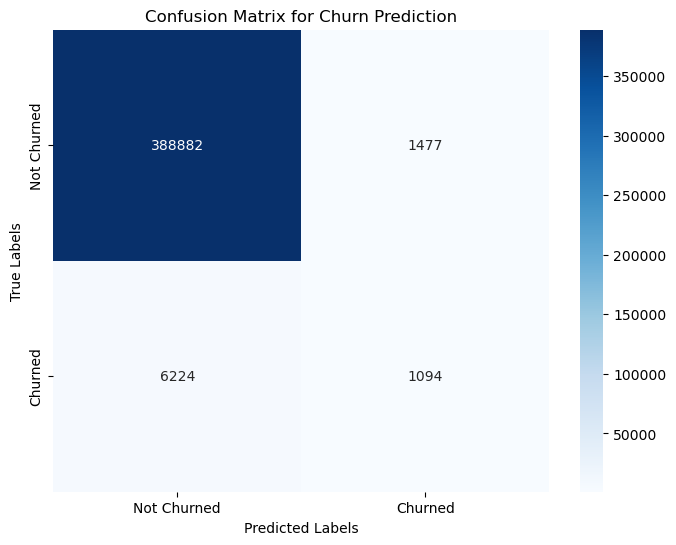

In [464]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Churn Prediction")
plt.show()